![JB%203.JPG](https://raw.githubusercontent.com/andrewwongls/dsc-5-capstone-project-online-ds-sp-000/master/JB%203.JPG)

![Introduction.jpg](https://raw.githubusercontent.com/andrewwongls/dsc-5-capstone-project-online-ds-sp-000/master/Introduction.jpg)

### About Airbnb

Together with Uber, the word Airbnb is synomous with the sharing economy. Airbnb is the most global online hospitality service that connects travellers with lodging from local homeowners. It is a marketplace for individuals to book or offer rooms. With services across numerous cities across the globe, Airbnb contains massive amounts of data on thousands of listings per region. There are unique listings in 81,000 cities, with over 6 million listings, in over 191 Countries.

The aims of this jupyter notebook project is to analyze the latest Airbnb publicly available data from insideairbnb.com, and other sources such as public blogs (such as medium.com, airbnb.io, etc.) and news outlets (such as New York Times, and Financial Times).

This jupyter notebook project attempts to experiment and focus on the behavioural sciences of nudging and sentiment analysis. I am starting with the point of adventuring into the unknown: colliding behavioural science and data science. There could be no significant outcome; however I gut feel say there will be some (yeah, we are still human, gut feel sometimes still help, rather than base on pure data decision-making!). 

**The Key Objectives of this Jupyter Notebook Project:**
>1. To extract and explore Airbnb spatial data - longitude, latitude, and customer reviews related to locations.
>2. To compare and contrast Airbnb customer reviews based on three very unique UNESCO Cities of Literature - Dublin, Edinburgh, and Melbourne. 

## IMPORTING LIBRARIES

In [1]:
# importing necessary libraries

import pandas as pd
from pandas.tools import plotting
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, plot, iplot
import seaborn as sns
import xgboost as xgb
from datetime import datetime
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline
plt.style.use('seaborn')
mpl.style.use('ggplot')
sns.set(style='whitegrid')


# importing map visulization libraries
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from geopy.distance import vincenty

# importing Sci-kit Learn libraries
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Imputer, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report, accuracy_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

# importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

# importing Natural Language Toolkits
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import re
import string

# importing Sci-py libraries
from scipy.stats import ttest_ind

# importing statsmodels to perform statistical analysis
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from statsmodels.formula.api import ols

# importing Predictive Analytics/ Machine Learning libraries
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# for oversampling library (dealing with Imbalanced Datasets)
from collections import Counter

# other libraries
import datetime
import time

# printing style available
print(plt.style.available)

# Change pandas viewing options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


![Obtain%20the%20Data.jpg](https://raw.githubusercontent.com/andrewwongls/dsc-5-capstone-project-online-ds-sp-000/master/Obtain%20the%20Data.jpg)

![Data%20Exploration.jpg](https://raw.githubusercontent.com/andrewwongls/dsc-5-capstone-project-online-ds-sp-000/master/Data%20Exploration.jpg)

# OBTAIN AND EXPLORING DATASETS (WORD CLOUD)

## FINDING AND LOVING DUBLIN - LET'S GO AROUND THE NEIGHBORHOOD

In [2]:
# obtaining dataset from inside airbnb for dublin

dublin_listings = pd.read_csv('dublin_listings.csv.gz', compression='gzip', low_memory=True)
dublin_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20190625153105,2019-06-25,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,"Hi, My name is Teresa and we have 3 rooms ava...",Our house was built in 1937 when there was ple...,none,I like our neighbourhood as there is no shorta...,Dundrum was always known as a Spa Town and the...,There is a bus stop 2 mins up the road from us...,We have a beautiful landscaped garden with tab...,We live on the premises so we are always on ha...,Welcome to our cottage and we hope you will en...,NaN,NaN,https://a0.muscache.com/im/pictures/525706/050...,NaN,193005,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,Dublin Ireland,"I am a friendly outgoing Irishwoman ,who love...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/193005/profil...,https://a0.muscache.com/im/users/193005/profil...,Churchtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Churchtown, Ireland",Churchtown,Dn Laoghaire-Rathdown,NaN,Churchtown,NaN,Dublin 14,Dublin,"Churchtown, Ireland",IE,Ireland,53.28995,-6.25813,t,Bed and breakfast,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,$50.00,NaN,NaN,NaN,$10.00,1,$0.00,3,60,3,3,60,60,3.0,60.0,yesterday,t,8,11,32,276,2019-06-25,202,46,2011-03-20,2019-06-14,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,moderate,t,t,3,0,3,0,2.01
1,68483,https://www.airbnb.com/rooms/68483,20190625153105,2019-06-25,Unique Central Dublin River-view,"My apartment provides an immaculate, comfortab...",My apartment overlooks the River Liffey with i...,"My apartment provides an immaculate, comfortab...",none,"Numerous great cafés, bars, 24 hour shops, gal...",I always share my view of the red giant Betelg...,"buses, Luas, tram, camels, train, rickshaws, D...",Access all areas!,"We go bungee jumping off the Cliffs of Moher, ...","No noise, no smoking, no parties, no unbooked ...",NaN,NaN,https://a0.muscache.com/im/pictures/830417/ec7...,NaN,339817,https://www.airbnb.com/users/show/339817,John,2011-01-08,Dublin,I am a visual artist and part-time lecturer at...,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/339817/profil...,https://a0.muscache.com/im/users/339817/profil...,Temple Ba

In [3]:
DB_Filtered = dublin_listings.filter(['review_scores_rating', 'review_scores_location', 'neighborhood_overview', 'transit', 'longitude', 'latitude'])
DB_Filtered.head(10)

,review_scores_rating,review_scores_location,neighborhood_overview,transit,longitude,latitude
0,95.0,10.0,I like our neighbourhood as there is no shorta...,There is a bus stop 2 mins up the road from us...,-6.25813,53.28995
1,99.0,10.0,"Numerous great cafés, bars, 24 hour shops, gal...","buses, Luas, tram, camels, train, rickshaws, D...",-6.26552,53.34501
2,96.0,10.0,Ballsbridge has lots of amenitites: restaurant...,We are very well connected to Dublin's Public ...,-6.23215,53.33149
3,NaN,NaN,NaN,NaN,-6.31992,53.30110
4,96.0,9.0,"I love Dundrum and its surrounding areas , The...",There is a tram service to the city about 10 m...,-6.25618,53.29178
5,96.0,9.0,Kilmainham is a perfect base in the sense that...,"Yeah, it's 5 minutes from a local tram line an...",-6.31497,53.34236
6,94.0,9.0,"My neighbourhood is very safe, friendly and o...","The bus is at the corner, the dart train is te...",-6.22075,53.33648
7,95.0,9.0,plenty of buses into the city and the area is ...,yes there are many buses into the city (PHONE ...,-6.23620,53.38988
8,96.0,10.0,"Close to the sea, hill walks and the city - vi...",Very regular buses + trams that go directly to...,-6.19094,53.28445
9,98.0,9.0,The area is best known for Royal Hospital Kilm...,Public transport to city centre....Bus passes ...,-6.30505,53.33845


In [4]:
DB_Filtered['review_scores_rating'].fillna(DB_Filtered['review_scores_rating'].mode()[0], inplace=True)
DB_Filtered['review_scores_location'].fillna(DB_Filtered['review_scores_location'].mode()[0], inplace=True)

In [5]:
DB_Filtered.isnull().sum()

review_scores_rating         0
review_scores_location       0
neighborhood_overview     3765
transit                   3588
longitude                    0
latitude                     0
dtype: int64

In [6]:
DB_Filtered.describe()

,review_scores_rating,review_scores_location,longitude,latitude
count,9902.000000,9902.000000,9902.000000,9902.000000
mean,94.691779,9.580893,-6.255382,53.345481
std,7.465446,0.703685,0.056382,0.042167
min,20.000000,2.000000,-6.519370,53.203550
25%,92.000000,9.000000,-6.277537,53.330925
50%,97.000000,10.000000,-6.259560,53.343915
75%,100.000000,10.000000,-6.236150,53.356738
max,100.000000,10.000000,-6.025940,53.614360


In [7]:
# wrapping the plotting in a function for easier access

def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=12, fontweight='bold')
    plt.show()

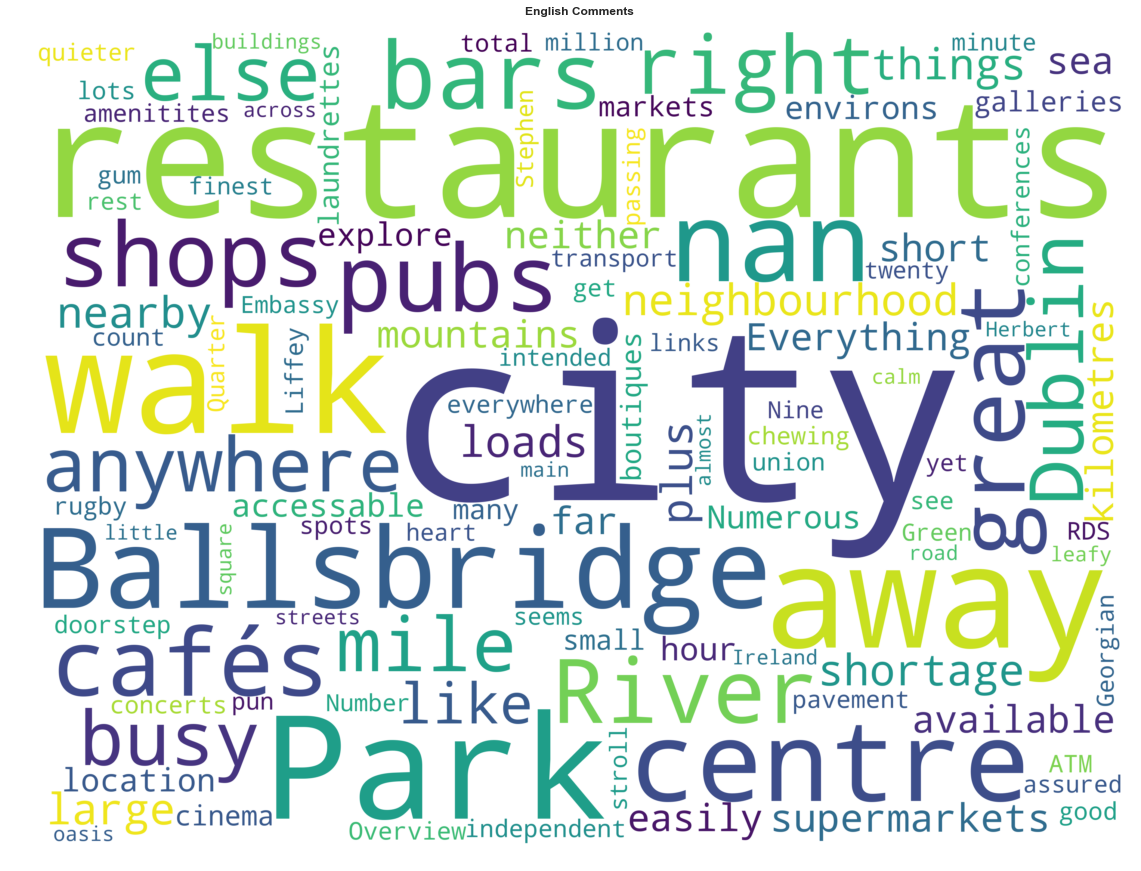

In [8]:
wordcloud = WordCloud(max_font_size=None, max_words=400, background_color="white", 
                      width=4000, height=3000,
                      stopwords=stopwords.words('english')).generate(str(DB_Filtered.neighborhood_overview.values))

plot_wordcloud(wordcloud, 'English')

## FINDING AND LOVING EDINBURGH - LET'S GO AROUND THE NEIGHBORHOOD

In [9]:
# obtaining dataset from inside airbnb for edinburgh

edinburgh_listings = pd.read_csv('edinburgh_listings.csv.gz', compression='gzip', low_memory=True)
edinburgh_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,15420,https://www.airbnb.com/rooms/15420,20190625184115,2019-06-25,Georgian Boutique Apt City Centre,"Stunning, impeccably refurbished spacious grou...",This is a huge and luxurious apartment for 2 -...,"Stunning, impeccably refurbished spacious grou...",none,"The neighbourhood is in the historic New Town,...",Please note that because of my interest in int...,It is easy to walk to many of the main tourist...,Guests have full access at the apartment. All...,Guests will be sent full details of what is su...,The apartment is strictly non-smoking and we r...,NaN,NaN,https://a0.muscache.com/im/pictures/cf69631f-4...,NaN,60423,https://www.airbnb.com/users/show/60423,Charlotte,2009-12-06,"Edinburgh, Scotland, United Kingdom","I have a background in property, having worked...",within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/60423/profile...,https://a0.muscache.com/im/users/60423/profile...,NaN,3.0,3.0,"['email', 'phone', 'manual_online', 'reviews',...",t,t,"Edinburgh, City of Edinburgh, United Kingdom",New Town,"Old Town, Princes Street and Leith Street",NaN,Edinburgh,City of Edinburgh,EH1 3LD,Edinburgh,"Edinburgh, United Kingdom",GB,United Kingdom,55.95689,-3.18768,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",861.0,$80.00,NaN,NaN,$200.00,$40.00,1,$0.00,3,30,1,3,30,30,2.9,30.0,today,t,6,12,22,193,2019-06-25,283,60,2011-01-18,2019-06-23,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,2.76
1,24288,https://www.airbnb.com/rooms/24288,20190625184115,2019-06-25,"Cool central Loft, sleeps 4, 2 double bed+en-s...",Boho rustic-chic former warehouse Loft located...,"Two bedroom, very central Loft apartment with ...",Boho rustic-chic former warehouse Loft located...,none,It's all in the mix: Culture-museums and galle...,The apartment is in the City centre so being a...,Walk to key central attractions or catch a bus...,The whole flat on the first floor and utility ...,Will meet guests on arrival and at check-out i...,Non smokers only and no smoking in the buildin...,NaN,NaN,https://a0.muscache.com/im/pictures/3460007/88...,NaN,46498,https://www.airbnb.com/users/show/46498,Gordon,2009-10-17,"Edinburgh, Scotland, United Kingdom",

In [10]:
ED_Filtered = edinburgh_listings.filter(['review_scores_rating', 'review_scores_location', 'neighborhood_overview', 'transit', 'longitude', 'latitude'])
ED_Filtered.head(10)

,review_scores_rating,review_scores_location,neighborhood_overview,transit,longitude,latitude
0,99.0,10.0,"The neighbourhood is in the historic New Town,...",It is easy to walk to many of the main tourist...,-3.18768,55.95689
1,92.0,10.0,It's all in the mix: Culture-museums and galle...,Walk to key central attractions or catch a bus...,-3.18467,55.94265
2,94.0,10.0,Quiet and easy access to outside.,From the Airpor (Website hidden by Airbnb) Ge...,-3.09525,55.94308
3,93.0,9.0,NaN,There are frequent buses to the centre and oth...,-3.17241,55.96600
4,98.0,10.0,We're at the quiet end of a residential street...,There are 30 bus routes within 5 minutes' walk...,-3.17851,55.94732
5,97.0,10.0,The Canongate is an area rich in culture and h...,The apartment is 400 metres from the Airport B...,-3.18380,55.95113
6,100.0,10.0,Hanover Street is arguably in the centre of th...,Walking is best to get around the city. All th...,-3.19834,55.95503
7,92.0,10.0,The Four Sisters Boatel Is moored in The Lochr...,30 seconds walk from the Boatel is the bus sto...,-3.20801,55.94257
8,96.0,10.0,NaN,There are many local buses just a 5 minute wal...,-3.17828,55.96049
9,99.0,10.0,Stockbridge is a beautiful spot and is rapidly...,There are plenty of buses that connect Stockbr...,-3.21612,55.95471


In [11]:
ED_Filtered['review_scores_rating'].fillna(ED_Filtered['review_scores_rating'].mode()[0], inplace=True)
ED_Filtered['review_scores_location'].fillna(ED_Filtered['review_scores_location'].mode()[0], inplace=True)

In [12]:
ED_Filtered.isnull().sum()

review_scores_rating         0
review_scores_location       0
neighborhood_overview     3773
transit                   3559
longitude                    0
latitude                     0
dtype: int64

In [13]:
ED_Filtered.describe()

,review_scores_rating,review_scores_location,longitude,latitude
count,13245.000000,13245.000000,13245.000000,13245.000000
mean,95.842431,9.673764,-3.198244,55.950495
std,6.457012,0.618313,0.037258,0.016005
min,20.000000,2.000000,-3.418340,55.864540
25%,94.000000,9.000000,-3.213760,55.940560
50%,98.000000,10.000000,-3.193960,55.950920
75%,100.000000,10.000000,-3.177350,55.960860
max,100.000000,10.000000,-3.078950,55.991760


In [14]:
# wrapping the plotting in a function for easier access

def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=12, fontweight='bold')
    plt.show()

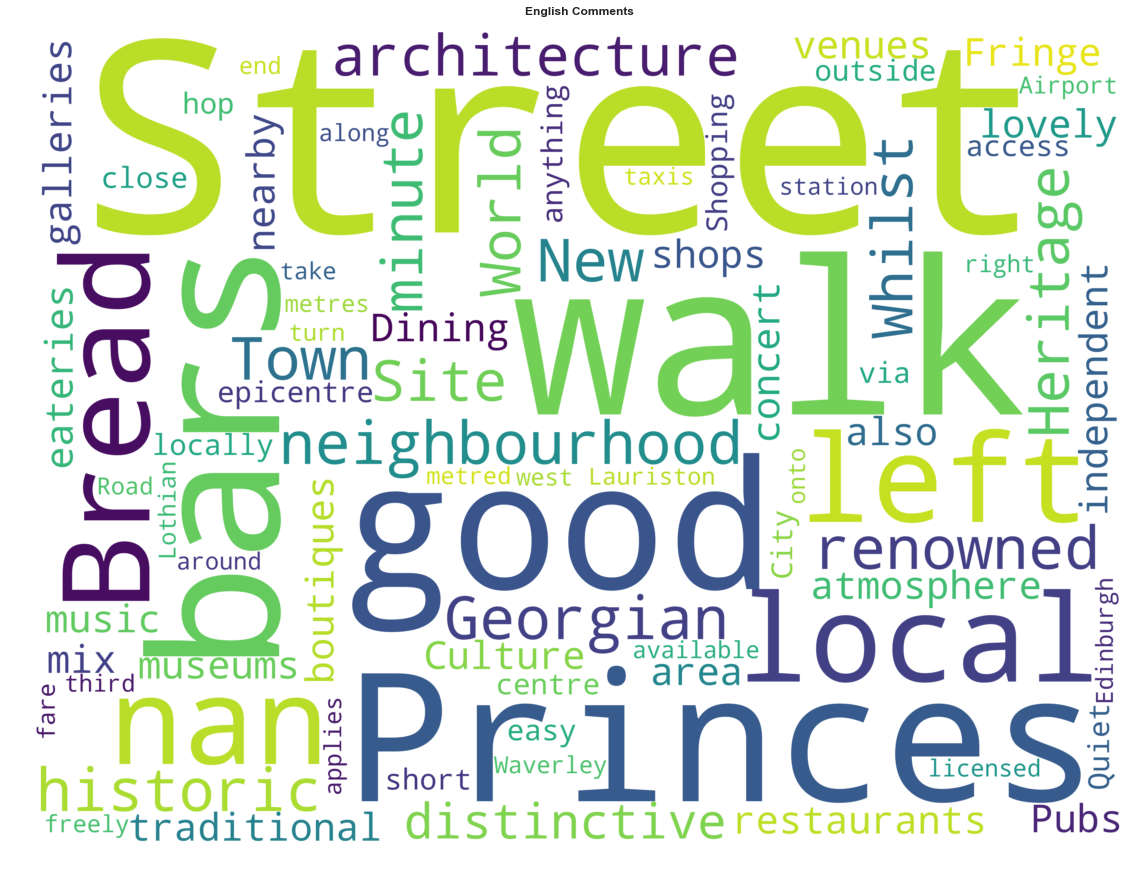

In [15]:
wordcloud = WordCloud(max_font_size=None, max_words=400, background_color="white", 
                      width=4000, height=3000,
                      stopwords=stopwords.words('english')).generate(str(ED_Filtered.neighborhood_overview.values))

plot_wordcloud(wordcloud, 'English')

## FINDING AND LOVING MELBOURNE - LET'S GO AROUND THE NEIGHBORHOOD

In [16]:
# obtaining dataset from inside airbnb for edinburgh

melbourne_listings = pd.read_csv('melbourne_listings.csv.gz', compression='gzip', low_memory=True)
melbourne_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,20190709174122,2019-07-10,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",none,Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",As much as the guest wants.,Prefence would be given females or a couple,NaN,NaN,https://a0.muscache.com/im/pictures/44620/5a58...,NaN,33057,https://www.airbnb.com/users/show/33057,Manju,2009-08-21,AU,About us: We are an East Indian couple in our ...,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",f,f,"Bulleen, VIC, Australia",Balwyn North,Manningham,NaN,Bulleen,VIC,3105,Melbourne,"Bulleen, Australia",AU,Australia,-37.77268,145.09213,f,House,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,""Pets live on this property"",Do...",NaN,$61.00,NaN,NaN,NaN,NaN,1,$22.00,1,365,1,1,365,365,1.0,365.0,24 months ago,t,30,60,90,365,2019-07-10,4,0,2011-05-24,2015-09-12,90.0,9.0,10.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.04
1,10803,https://www.airbnb.com/rooms/10803,20190709174122,2019-07-10,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,none,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,I'm home mostly but sometimes I may be working...,Theres a yoga studio downstairs so if you see ...,NaN,NaN,https://a0.muscache.com/im/pictures/31323790/9...,NaN,38901,https://www.airbnb.com/users/show/38901,Lindsay,2009-09-16,"Melbourne, Victoria, Australia",As an artist working in animation and video I ...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/38901/profile...,https://a0.muscache.com/im/users/38901/profile...,Brunswick,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Brunswick East, VIC, Australia",Brunswick,Moreland,NaN,Brunswick East,VIC,3057,Melbourne,"Brunswick East, 

In [17]:
MR_Filtered = melbourne_listings.filter(['review_scores_rating', 'review_scores_location', 'neighborhood_overview', 'transit', 'longitude', 'latitude'])
MR_Filtered.head(10)

,review_scores_rating,review_scores_location,neighborhood_overview,transit,longitude,latitude
0,90.0,9.0,Very safe! Family oriented. Older age group.,"YES ! The bus (305,309) is exactly two blocks ...",145.09213,-37.77268
1,89.0,9.0,This hip area is a crossroads between two grea...,Easy transport options - the tram is right out...,144.98074,-37.76651
2,92.0,9.0,A stay at our apartment means you can enjoy so...,Our apartment is located within walking distan...,144.97737,-37.85976
3,94.0,9.0,"This is a great neighbourhood – it is quiet, y...",Public transport is super convenient with a ch...,144.98923,-37.75897
4,90.0,10.0,NaN,NaN,144.99224,-37.86453
5,96.0,10.0,Our street is quiet & secluded but within walk...,If you're arriving via the airport (Tullamarin...,145.33936,-38.05725
6,94.0,9.0,"The neighbours are quiet and friendly, please...","8-10 minutes walk to local train station, and ...",145.00082,-37.69729
7,95.0,9.0,MCG (15min walk) Rod Laver Arena Fitzroy Garde...,Numerous buses on Victoria Parade will take yo...,144.98592,-37.81027
8,97.0,10.0,Oakleigh is one of the most convenient and div...,"Monash University, Clayton Campus is a 10 minu...",145.11447,-37.89960
9,99.0,10.0,"I love this street - it is full of trees, bird...",Bus is at the end of the street. I have off st...,145.14157,-38.14932


In [18]:
MR_Filtered['review_scores_rating'].fillna(MR_Filtered['review_scores_rating'].mode()[0], inplace=True)
MR_Filtered['review_scores_location'].fillna(MR_Filtered['review_scores_location'].mode()[0], inplace=True)

In [19]:
MR_Filtered.isnull().sum()

review_scores_rating         0
review_scores_location       0
neighborhood_overview     8250
transit                   7932
longitude                    0
latitude                     0
dtype: int64

In [20]:
MR_Filtered.describe()

,review_scores_rating,review_scores_location,longitude,latitude
count,23999.000000,23999.000000,23999.000000,23999.000000
mean,95.317347,9.797533,145.008417,-37.827159
std,8.197585,0.614138,0.129989,0.067677
min,20.000000,2.000000,144.532290,-38.268430
25%,94.000000,10.000000,144.957315,-37.853890
50%,98.000000,10.000000,144.978350,-37.818340
75%,100.000000,10.000000,145.017660,-37.802280
max,100.000000,10.000000,145.839130,-37.482600


In [21]:
# wrapping the plotting in a function for easier access

def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=12, fontweight='bold')
    plt.show()

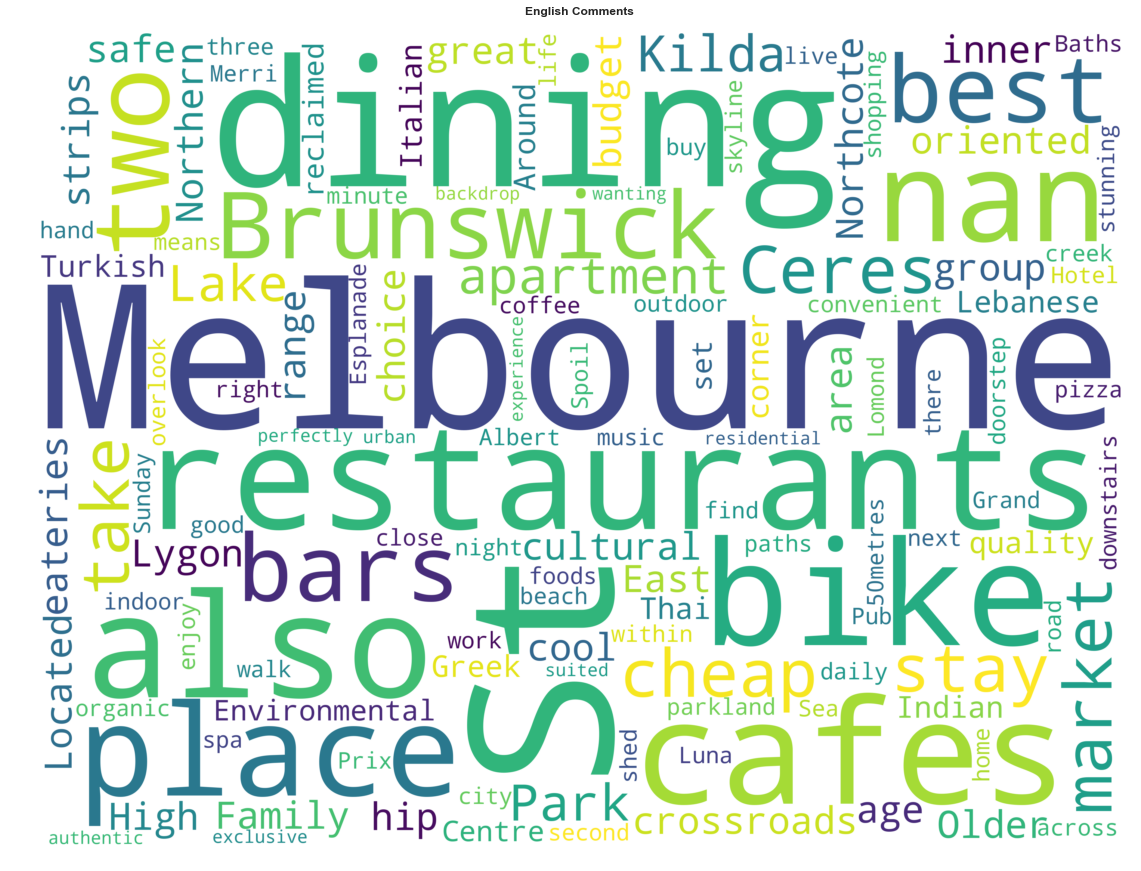

In [22]:
wordcloud = WordCloud(max_font_size=None, max_words=400, background_color="white", 
                      width=4000, height=3000,
                      stopwords=stopwords.words('english')).generate(str(MR_Filtered.neighborhood_overview.values))

plot_wordcloud(wordcloud, 'English')

# OBTAIN AND EXPLORING DATASETS (SEABORN SPATIAL INFORMATION)

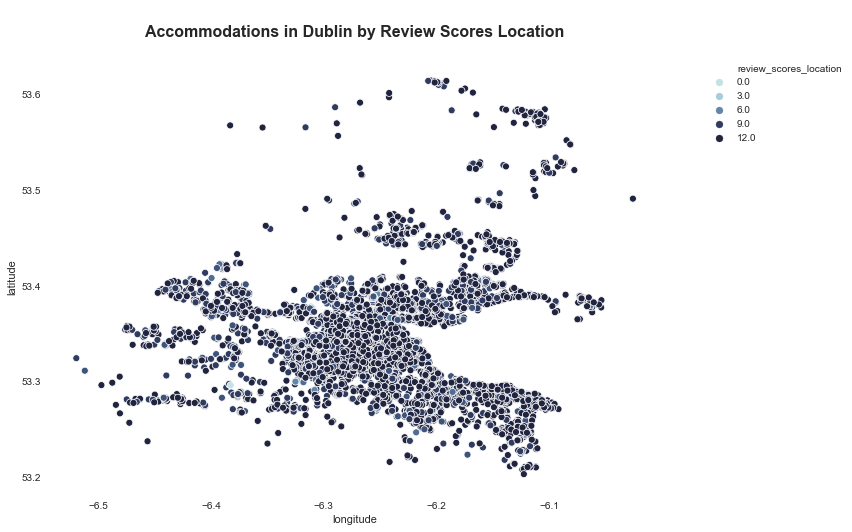

In [24]:
# preparing to plot

sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
fig, ax = plt.subplots(figsize=(11,8))

# drawing scatter plot

ax = sns.scatterplot(x="longitude", y="latitude", sizes=(1, 10),
                     hue='review_scores_location', palette=cmap,  data=DB_Filtered)
ax.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0.)
plt.title('\nAccommodations in Dublin by Review Scores Location\n', fontsize=16, fontweight='bold')

# removing spines

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

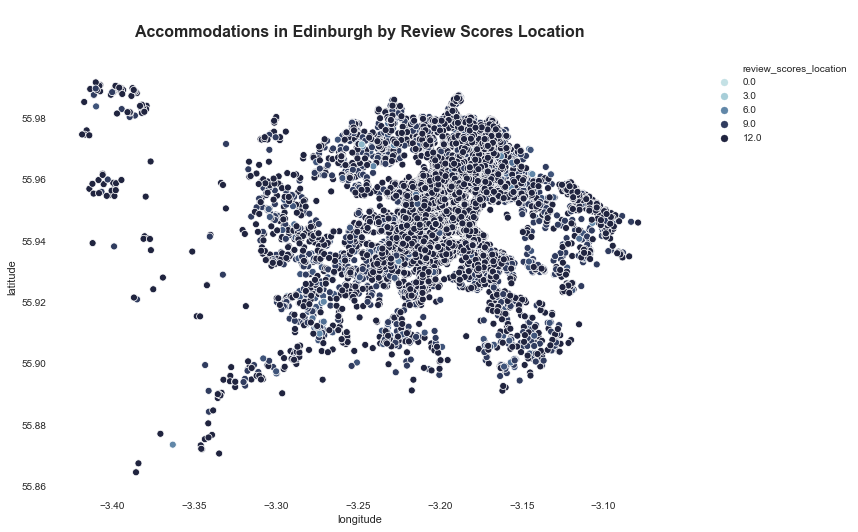

In [25]:
# preparing to plot

sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
fig, ax = plt.subplots(figsize=(11,8))

# drawing scatter plot

ax = sns.scatterplot(x="longitude", y="latitude", sizes=(1, 10),
                     hue='review_scores_location', palette=cmap,  data=ED_Filtered)
ax.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0.)
plt.title('\nAccommodations in Edinburgh by Review Scores Location\n', fontsize=16, fontweight='bold')

# removing spines

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

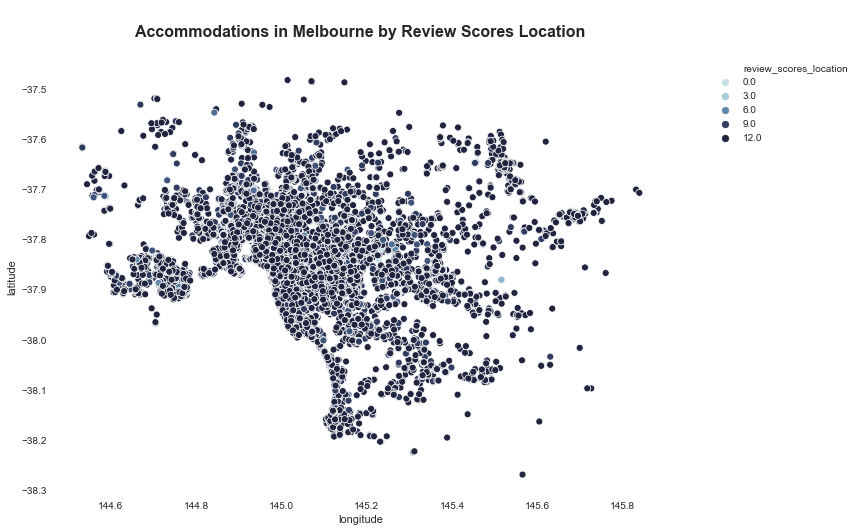

In [26]:
# preparing to plot

sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
fig, ax = plt.subplots(figsize=(11,8))

# drawing scatter plot

ax = sns.scatterplot(x="longitude", y="latitude", sizes=(1, 10),
                     hue='review_scores_location', palette=cmap,  data=MR_Filtered)
ax.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0.)
plt.title('\nAccommodations in Melbourne by Review Scores Location\n', fontsize=16, fontweight='bold')

# removing spines

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

![Data%20Interpretation.jpg](https://raw.githubusercontent.com/andrewwongls/dsc-5-capstone-project-online-ds-sp-000/master/Data%20Interpretation.jpg)

# CONCLUSION

In this Jupyter Notebook Project, I have experimented with two formats. First, using NLTK Word Cloud to generate insights, and side-by-side analysis the Word Cloud through human-in-the-loop (that's me here). Second, using purely using Seaborn to generate insights based on spatial information of city location, latitude and longitude. 

The key learnings are as follow:

1. Machine learning + human-in-the-loop provides more contextual depth. It is more satisfying for the human too (that's me here again), as I can learn more about data, and start to empathize the customer reviews (see Pocket Guidebooks below for more information about design thinking and design sprinting). *The question here: Human tends to generate imagination and insight as we go through a subject of interest. What will be a good process to capture this generative data insight and feed back into the data?*


2. While I was working as the 'Human' counterpart to the 'Machine', I am starting to fire up my imaginations about what's possible in terms of developing new product, planning for next research scope, etc. This is in complete opposite of generative adversarial network (GAN), whereby is a machine learning (ML) model in which two neural networks compete with each other to become more accurate in their predictions. GANs typically run unsupervised and use a cooperative zero-sum game framework to learn. *The question here: There is a lot of research about human-in-the-loop in machine learning. I am supportive of this movement/ research. Could there be General Peripheral Insight Network (GPIN) whereby human helps to generate more insight to feed into machine?*


3. The supervised, semi-supervised, active learning, and transfer learning are the usual machine learning approaches. I want to take an expansionist view of the world, not just learning. The expansionist view touches on human ability to imagine and take on a creative curve into unknown. *The question here: What is expansionist view in the age of machine learning?*

# LIMITATIONS AND FUTURE SCOPE

### LIMITATION

This is a short Jupyter Notebook Project (I wish I have more time!) examination into spatial data research of Dublin, Edinburgh, and Melbourne based on Airbnb customer reviews (specifically on reviews of the neighborhood). I have written a few short notes about in the notebook, though I wish to have more time to go in-depth. 


### FUTURE SCOPE

Based on the conclusions above, I have posed a few questions, as follow:

1. Human tends to generate imagination and insight as we go through a subject of interest. What will be a good process to capture this generative data insight and feed back into the data?


2. There is a lot of research about human-in-the-loop in machine learning. I am supportive of this movement/ research. Could there be General Peripheral Insight Network (GPIN) whereby human helps to generate more insight to feed into machine?


3. The expansionist view touches on human ability to imagine and take on a creative curve into unknown. The question here: What is expansionist view in the age of machine learning?

I want to take the above questions further, sort of like forward looking notes on what is possible (see Pocket Guidebook below for links of these Forward Looking Notes)

# POCKET GUIDEBOOK

In the Medium Blog search for: 

1. Andrew Wong + How to better design data differentiator to solve heard problem.

2. Andrew Wong + How to sell your data insights to broader stakeholders.

3. Andrew Wong + The quick wins (and the long game) of datasets

**Thank you for reading this Jupyter Notebook. Feedback is welcome, please email at andrewwongls@outlook.com**